Neste relatório, serão introduzidos e explorados em prática os conceitos transformações geométricas, como rotação e translação, filtragem de banda e algumas manipulações básicas de imagem utilizando as bibliotecas _OpenCV_, _Numpy_, _MatPlotLib_ e _Scipy_ para realizar as atividades propostas.

Exercício 1 - Fazer um filtro de Prewitt para visualizar sua webcam

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

O objetivo desta atividade é aplicar o filtro de Prewitt, obtendo a entrada da webcam. Para aplicar o filtro, salvamos os frames da webcam e o convertemos em um array. Após isso, fazemos uma convolução do kernel de Prewitt com a imagem, tanto na vertical quanto na horizontal. Para realizar a convolução, utilizamos `np.convolve()`, passando a imagem original e a matriz como parâmetros, tanto na horizontal como na vertical. Por fim, a imagem final é constituida da raiz da soma das convoluções das matrizes vertical e horizontal do kernel, transformado novamente em um array e exibimos o resultado.

In [2]:
cap = cv2.VideoCapture(0)

# Making window size adjustable
cv2.namedWindow('image', cv2.WINDOW_NORMAL)

while (1):
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    prewitt_cross_v = np.array([[-1, -1, -1],
                                [0, 0, 0],
                                [1, 1, 1]])

    prewitt_cross_h = np.array([[-1, 0, 1],
                                [-1, 0, 1],
                                [-1, 0, 1]])

    frame= np.asarray(frame, dtype="int32")
    frame=frame/255.

    vertical = ndimage.convolve(frame, prewitt_cross_v)
    horizontal = ndimage.convolve(frame, prewitt_cross_h)

    output_image = np.sqrt(np.square(horizontal) + np.square(vertical))
    output_image = np.asarray(np.clip(output_image, 0, 255))
    cv2.imshow("saida",output_image)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break


[ WARN:0@2.645] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


: 

: 

Exercício 2 - A partir da imagem do aviao.jpg, montar a imagem original, com ruido salt&pepper, com ruido gaussiano, e aplicar os filtros de media, mediana e gaussiano, com máscara de 3x3 e 7x7, com o histograma das respectivas imagens obtidas.

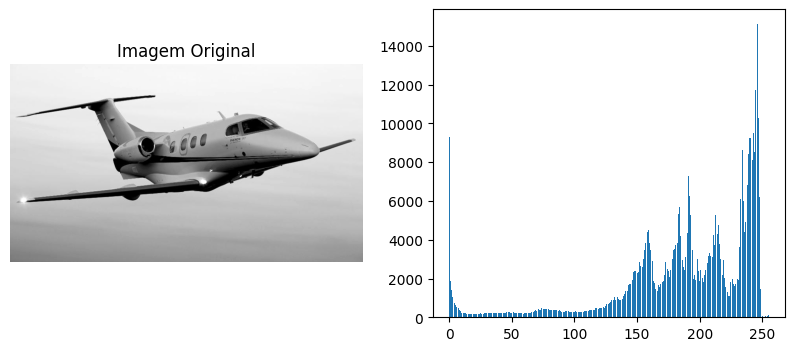

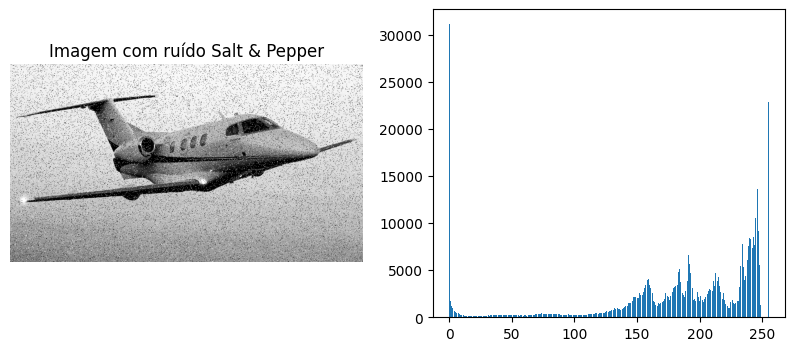

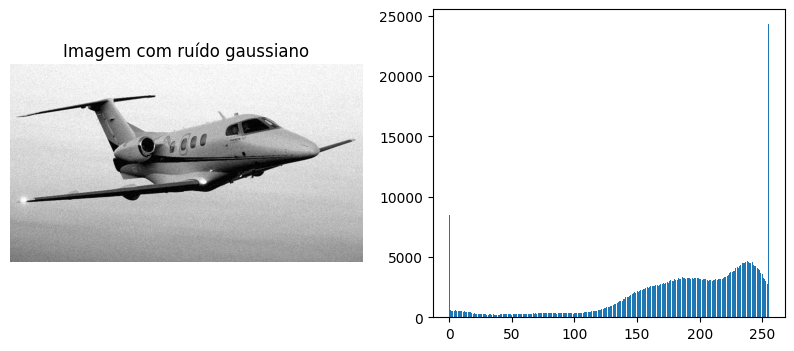

In [3]:
def gaussian_noise(size, mean=0, std=0.01):

    noise = np.multiply(np.random.normal(mean, std, size), 255)
    
    return noise


def impulsive_noise(image, prob=0.1, mode='salt_and_pepper'):

    noise = np.array(image, copy=True)
    for x in np.arange(image.shape[0]):
        for y in np.arange(image.shape[1]):
            rnd = np.random.random()
            if rnd < prob:
                rnd = np.random.random()
                if rnd > 0.5:
                    noise[x,y] = 255
                else:
                    noise[x,y] = 0
    
    return noise


def gera_histograma(image,title):
    hist_img,_ = np.histogram(image, bins=256, range=(0,255))
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.title(title)
    plt.imshow(image, cmap="gray", vmin=0, vmax=255)
    plt.axis('off')
    plt.subplot(122)
    plt.bar(np.arange(256), hist_img)    



#imagem original e seu histograma
img = cv2.imread("aviao.jpg",0)
np.unique(img)
gera_histograma(img,"Imagem Original")

#imagem com ruído salt&pepper
img_imp = impulsive_noise(img, prob=0.1)
gera_histograma(img_imp,"Imagem com ruído Salt & Pepper")

#imagem com ruído gaussiano
# creating the noise matrix to be added
gau_noise = gaussian_noise(img.shape, mean=0, std=0.05)
# adding and clipping values below 0 or above 255
img_gau = np.clip(img.astype(int)+gau_noise, 0, 255)
gera_histograma(img_gau,"Imagem com ruído gaussiano")

Aplicando filtros na imagem com ruído Salt & Pepper

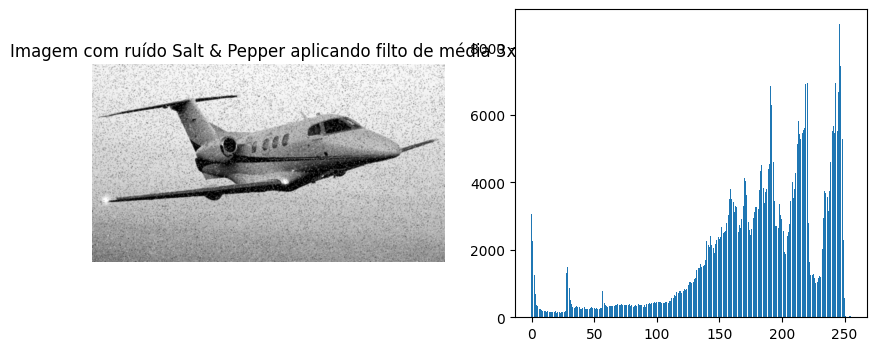

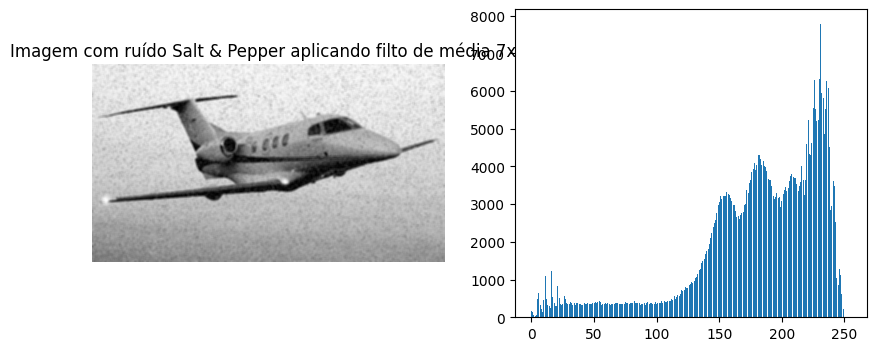

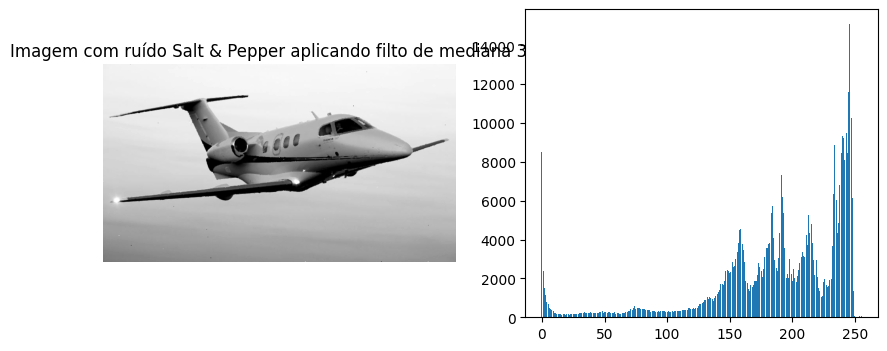

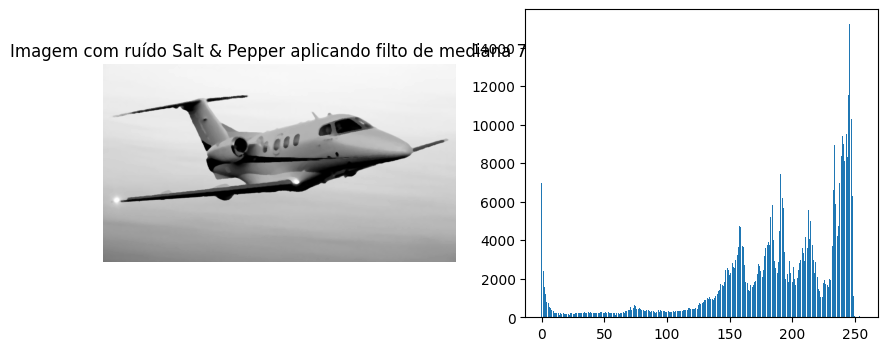

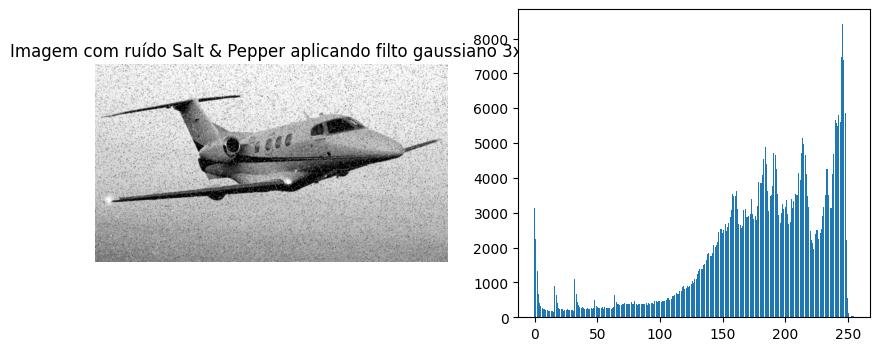

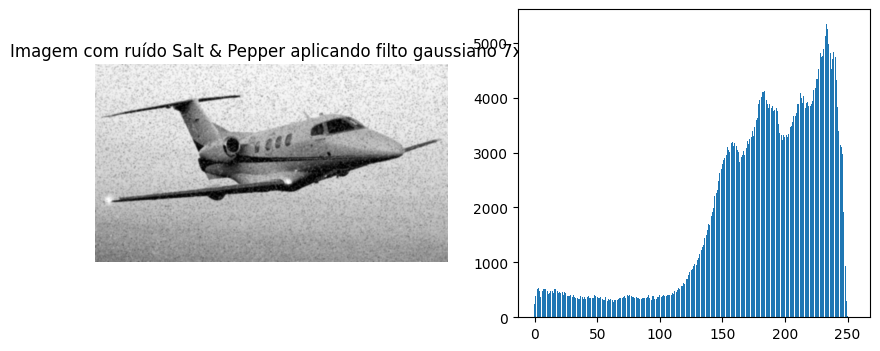

In [4]:
# Filtro de media(blur) 3x3 na imagem com ruído Salt & Pepper
filter_blur=cv2.blur(img_imp,ksize=(3,3))
gera_histograma(filter_blur,"Imagem com ruído Salt & Pepper aplicando filto de média 3x3")


# Filtro de media(blur) 7x7 na imagem com ruído Salt & Pepper
filter_blur=cv2.blur(img_imp,ksize=(7,7))
gera_histograma(filter_blur,"Imagem com ruído Salt & Pepper aplicando filto de média 7x7")

#Filtro MedianBlur(mediana) 3x3 na imagem com ruído Salt & Pepper 
median=cv2.medianBlur(np.uint8(img_imp),3)
gera_histograma(median,"Imagem com ruído Salt & Pepper aplicando filto de mediana 3x3")

#Filtro MedianBlur(mediana) 7x7 na imagem com ruído Salt & Pepper 
median=cv2.medianBlur(np.uint8(img_imp),7)
gera_histograma(median,"Imagem com ruído Salt & Pepper aplicando filto de mediana 7x7")


#Filtro Gaussiano 3x3 na imagem com ruído Salt & Pepper 
gaugaussian=cv2.GaussianBlur(src=img_imp,ksize=(3,3),sigmaX=0)
gera_histograma(gaugaussian,"Imagem com ruído Salt & Pepper aplicando filto gaussiano 3x3")

#Filtro Gaussiano 7x7 na imagem com ruído Salt & Pepper 
gaugaussian=cv2.GaussianBlur(src=img_imp,ksize=(7,7),sigmaX=0)
gera_histograma(gaugaussian,"Imagem com ruído Salt & Pepper aplicando filto gaussiano 7x7")

Aplicando filtros na imagem com ruído Gaussiano

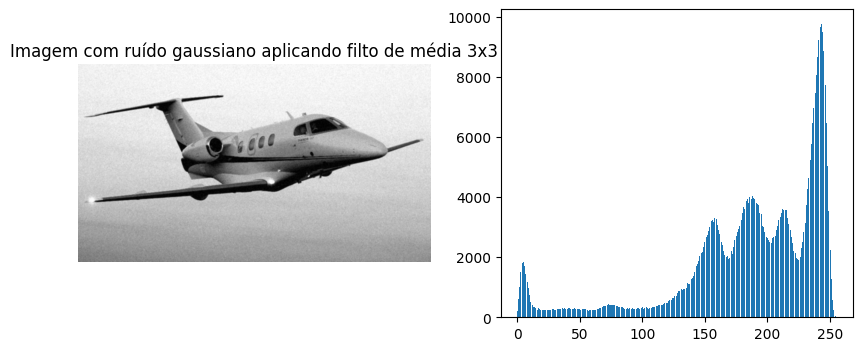

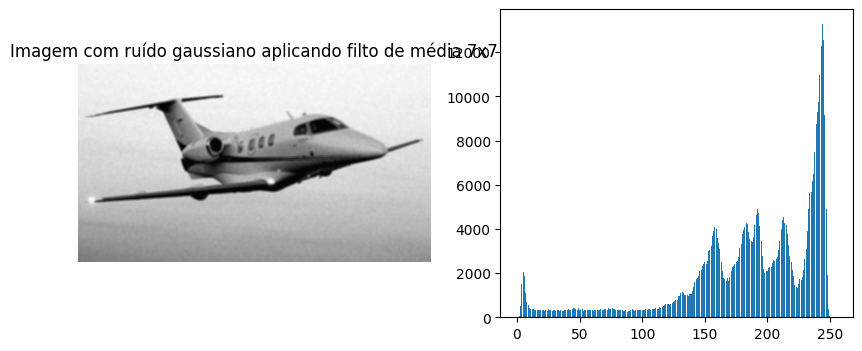

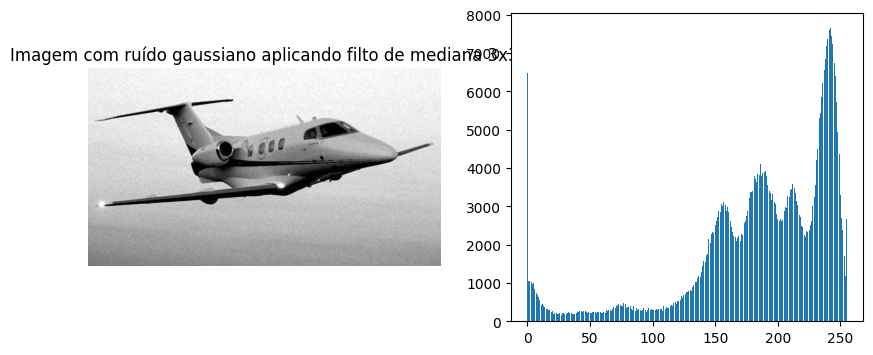

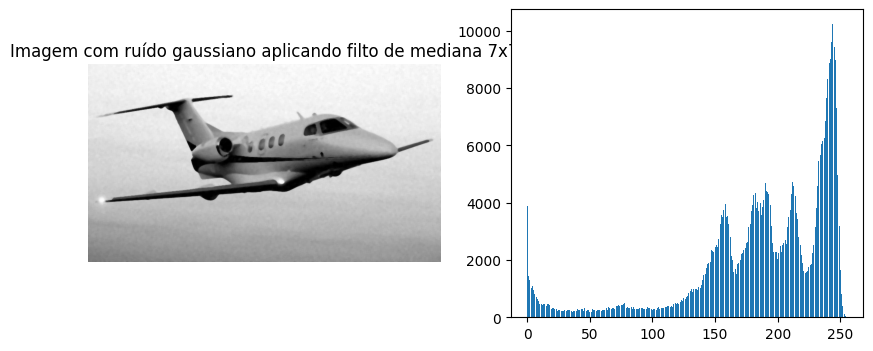

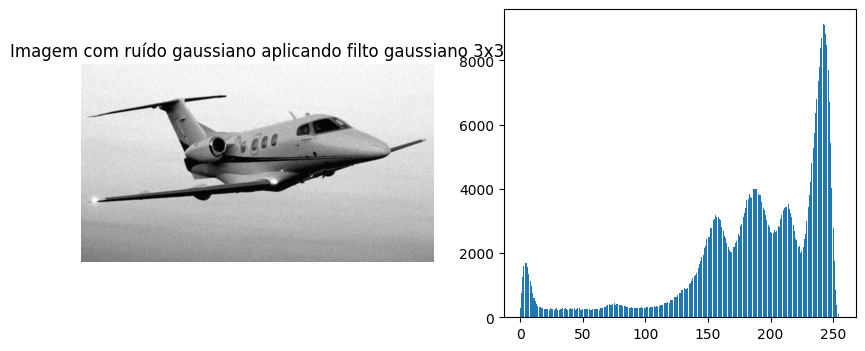

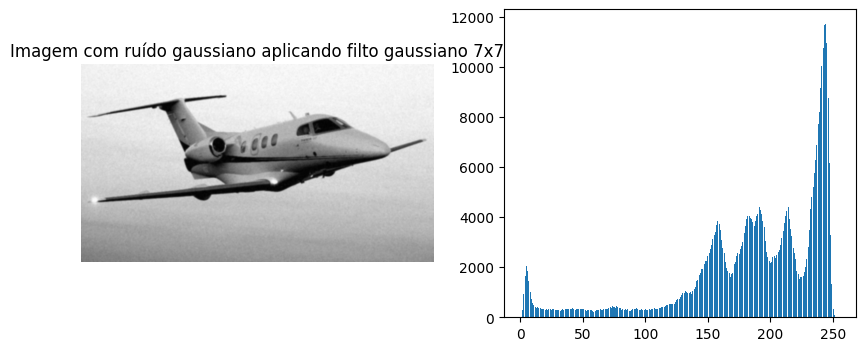

In [5]:
# Filtro de media(blur) 3x3 na imagem com ruído gaussiano
filter_blur=cv2.blur(img_gau,ksize=(3,3))
gera_histograma(filter_blur,"Imagem com ruído gaussiano aplicando filto de média 3x3")

# Filtro de media(blur) 7x7 na imagem com ruído gaussiano
filter_blur=cv2.blur(img_gau,ksize=(7,7))
gera_histograma(filter_blur,"Imagem com ruído gaussiano aplicando filto de média 7x7")

#Filtro MedianBlur(mediana) 3x3 na imagem com ruído gaussiano 
median=cv2.medianBlur(np.uint8(img_gau),3)
gera_histograma(median,"Imagem com ruído gaussiano aplicando filto de mediana 3x3")


#Filtro MedianBlur(mediana) 7x7 na imagem com ruído gaussiano 
median=cv2.medianBlur(np.uint8(img_gau),7)
gera_histograma(median,"Imagem com ruído gaussiano aplicando filto de mediana 7x7")


#Filtro Gaussiano 3x3 na imagem com ruído gaussiano 
gaugaussian=cv2.GaussianBlur(src=img_gau,ksize=(3,3),sigmaX=0)
gera_histograma(gaugaussian,"Imagem com ruído gaussiano aplicando filto gaussiano 3x3")

#Filtro Gaussiano 7x7 na imagem com ruído gaussiano 
gaugaussian=cv2.GaussianBlur(src=img_gau,ksize=(7,7),sigmaX=0)
gera_histograma(gaugaussian,"Imagem com ruído gaussiano aplicando filto gaussiano 7x7")

Exercício 3 - Aplicar o  filtros Sobel, Roberts, Preewit e Canny na imagem do avião ;
depois , na imagem original, aplicar um filtro de media 5x5, e repetir a operação

O objetivo desta atividade é aplicar os filtros de Sobel, Roberts, Prewitt e Canny na imagem do avião, que foi convertida num array. Após isso, fazemos uma convolução do kernel para cada um dos métodos supramencionados com a imagem, tanto na vertical quanto na horizontal. Para realizar a convolução, utilizamos `np.convolve()`, passando a imagem original e a matriz como parâmetros, tanto na horizontal como na vertical. Por fim, a imagem final é constituida da raiz da soma das convoluções das matrizes vertical e horizontal do kernel, transformado novamente em um array e exibimos o resultado.

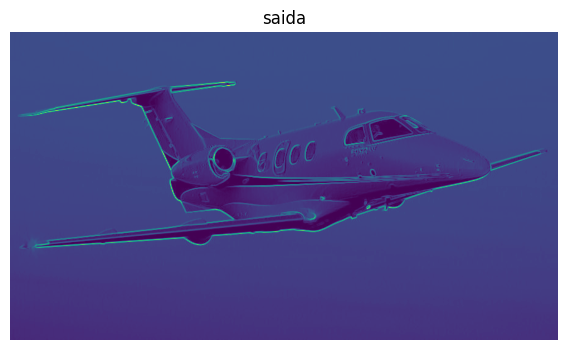

In [19]:
img = cv2.imread("aviao.jpg",0)
img_sobel = img
sobel_cross_v = np.array( [[-1,-2,-1 ],
                             [0,0,0],
                             [1,2,1]])
  
sobel_cross_h = np.array( [[-1,0,1],
                             [-1,0,2],
                             [-1,0,1]])

img_sobel= np.asarray(img_sobel, dtype="int32")
img_sobel=img_sobel/255.

vertical = ndimage.convolve( img_sobel, sobel_cross_v )
horizontal = ndimage.convolve( img_sobel, sobel_cross_h )
  
output_image = np.sqrt( np.square(horizontal) + np.square(vertical))
output_image = np.asarray(np.clip(output_image,0,255))
result_sobel_original = output_image


plt.figure(figsize=(10,4))
plt.title("saida")
plt.axis('off')
plt.imshow(result_sobel_original)

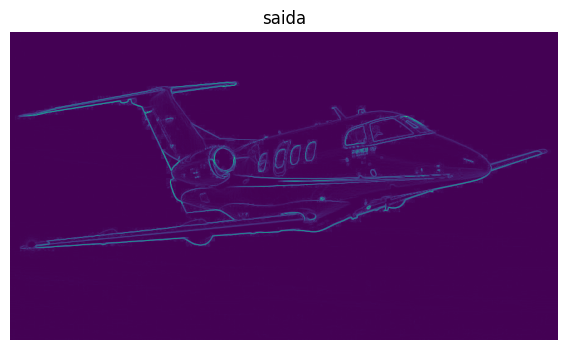

In [7]:
img = cv2.imread("aviao.jpg",0)
img_roberts = img
roberts_cross_v = np.array( [[0,0,0 ],
                             [0,1,0],
                             [0,0,-1]])
  
roberts_cross_h = np.array( [[0,0,0 ],
                             [0,0,1],
                             [0,-1,0]])

img_roberts= np.asarray(img, dtype="int32")
img_roberts=img_roberts/255.

vertical = ndimage.convolve( img_roberts, roberts_cross_v )
horizontal = ndimage.convolve( img_roberts, roberts_cross_h )
  
output_image = np.sqrt( np.square(horizontal) + np.square(vertical))
output_image = np.asarray(np.clip(output_image,0,255))
result_roberts_original = output_image
plt.figure(figsize=(10,4))
plt.title("saida")
plt.axis('off')
plt.imshow(result_roberts_original)

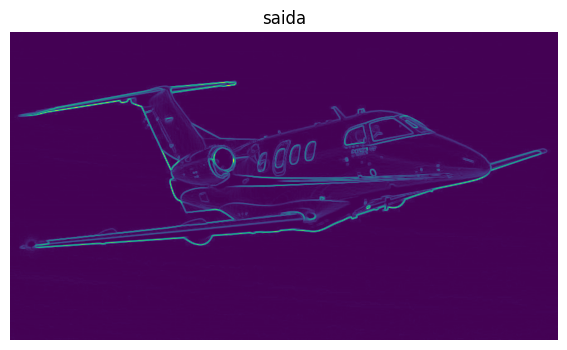

In [8]:
img = cv2.imread("aviao.jpg",0)
img_prewitt = img
prewitt_cross_v = np.array( [[-1,-1,-1],
                             [0,0,0],
                             [1,1,1]])
  
prewitt_cross_h = np.array( [[-1,0,1],
                             [-1,0,1],
                             [-1,0,1]])

img_prewitt= np.asarray(img, dtype="int32")
img_prewitt=img_prewitt/255.

vertical = ndimage.convolve( img_prewitt, prewitt_cross_v )
horizontal = ndimage.convolve( img_prewitt, prewitt_cross_h )
  
output_image = np.sqrt( np.square(horizontal) + np.square(vertical))
output_image = np.asarray(np.clip(output_image,0,255))
result_prewitt_original = output_image
plt.figure(figsize=(10,4))
plt.title("saida")
plt.axis('off')
plt.imshow(result_prewitt_original)

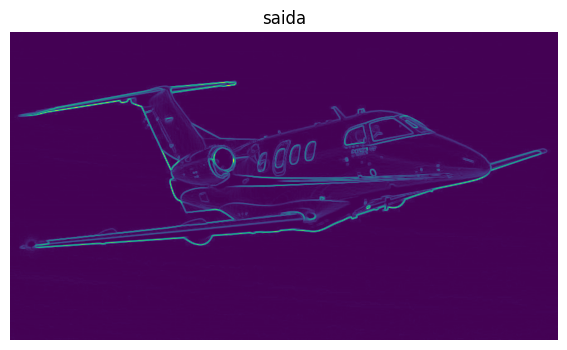

In [9]:
img = cv2.imread("aviao.jpg",0)
edges = cv2.Canny(img,100,200)
result_canny_original = output_image
plt.figure(figsize=(10,4))
plt.title("saida")
plt.axis('off')
plt.imshow(result_canny_original)

Aplicando filtro de média 5x5 e refazendo os filtros pedidos

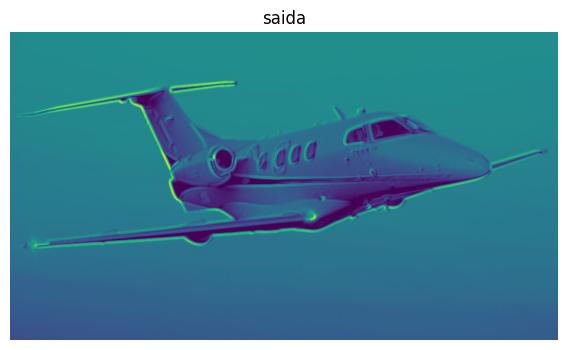

In [10]:
img = cv2.imread("aviao.jpg",0)
img_median = cv2.blur(img,(5,5))
img_sobel = img_median
sobel_cross_v = np.array( [[-1,-2,-1 ],
                             [0,0,0],
                             [1,2,1]])
  
sobel_cross_h = np.array( [[-1,0,1],
                             [-1,0,2],
                             [-1,0,1]])

img_sobel= np.asarray(img_sobel, dtype="int32")
img_sobel=img_sobel/255.

vertical = ndimage.convolve( img_sobel, sobel_cross_v )
horizontal = ndimage.convolve( img_sobel, sobel_cross_h )
  
output_image = np.sqrt( np.square(horizontal) + np.square(vertical))
output_image = np.asarray(np.clip(output_image,0,255))
result_sobel_median = output_image
plt.figure(figsize=(10,4))
plt.title("saida")
plt.axis('off')
plt.imshow(result_sobel_median)

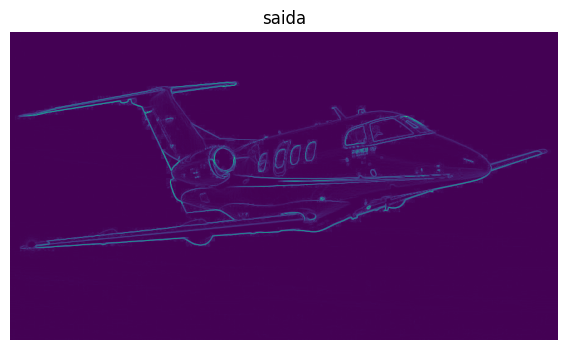

In [11]:
img = cv2.imread("aviao.jpg",0)
img_median = cv2.blur(img,(5,5))
img_roberts = img_median
roberts_cross_v = np.array( [[0,0,0 ],
                             [0,1,0],
                             [0,0,-1]])
  
roberts_cross_h = np.array( [[0,0,0 ],
                             [0,0,1],
                             [0,-1,0]])

img_roberts= np.asarray(img, dtype="int32")
img_roberts=img_roberts/255.

vertical = ndimage.convolve( img_roberts, roberts_cross_v )
horizontal = ndimage.convolve( img_roberts, roberts_cross_h )
  
output_image = np.sqrt( np.square(horizontal) + np.square(vertical))
output_image = np.asarray(np.clip(output_image,0,255))
result_roberts_median = output_image
plt.figure(figsize=(10,4))
plt.title("saida")
plt.axis('off')
plt.imshow(output_image)

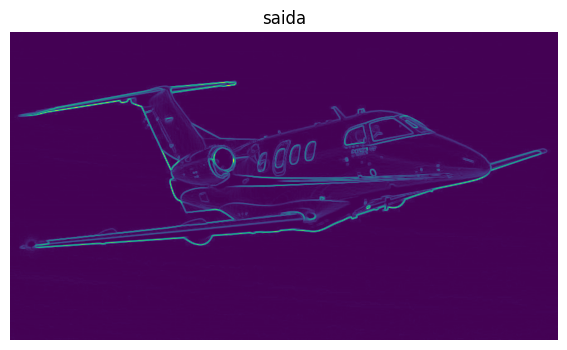

In [12]:
img = cv2.imread("aviao.jpg",0)
img_median = cv2.blur(img,(5,5))
img_prewitt = img_median
prewitt_cross_v = np.array( [[-1,-1,-1],
                             [0,0,0],
                             [1,1,1]])
  
prewitt_cross_h = np.array( [[-1,0,1],
                             [-1,0,1],
                             [-1,0,1]])

img_prewitt= np.asarray(img, dtype="int32")
img_prewitt=img_prewitt/255.

vertical = ndimage.convolve( img_prewitt, prewitt_cross_v )
horizontal = ndimage.convolve( img_prewitt, prewitt_cross_h )
  
output_image = np.sqrt( np.square(horizontal) + np.square(vertical))
output_image = np.asarray(np.clip(output_image,0,255))
result_prewitt_median = output_image
plt.figure(figsize=(10,4))
plt.title("saida")
plt.axis('off')
plt.imshow(output_image)

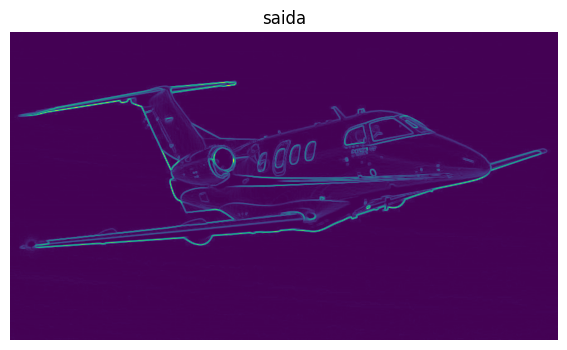

In [13]:
img = cv2.imread("aviao.jpg",0)
img_median = cv2.blur(img,(5,5))
edges = cv2.Canny(img_median,100,200)
result_canny_median = output_image
plt.figure(figsize=(10,4))
plt.title("saida")
plt.axis('off')
plt.imshow(result_canny_median)

Exercício 4 - A partir das imagens obtidas acima, faca uma operação AND com a imagem original e observe
 o resultado.

In [20]:
img = cv2.imread("aviao.jpg")
and_sobel_original = cv2.bitwise_and(img,np.uint8(result_sobel_original))
and_roberts_original = cv2.bitwise_and(img,result_roberts_original)
and_prewitt_original = cv2.bitwise_and(img,result_prewitt_original)
and_canny_original = cv2.bitwise_and(img,result_canny_original)
and_sobel_median = cv2.bitwise_and(img,result_sobel_median)
and_roberts_median = cv2.bitwise_and(img,result_roberts_median)
and_prewitt_median = cv2.bitwise_and(img,result_prewitt_median)
and_canny_median = cv2.bitwise_and(img,result_canny_median)

bitwises = [and_sobel_original, and_roberts_original, and_prewitt_original, and_canny_original, and_sobel_median, and_roberts_median, and_prewitt_median, and_canny_median]
titles = ['Sobel na Imagem Original', 'Roberts na Imagem Original', 'Prewitt na Imagem Original', 'Canny na Imagem Original', 'Sobel na Imagem com Média', 'Roberts na Imagem com Média', 'Roberts na Imagem com Média', 'Prewitt na Imagem com Média', 'Canny na Imagem com Média']
images = zip(bitwises, titles)
f, axarr = plt.subplots(4,4, figsize(20,20))
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(images[(i*4)+j][0])
        axarr[i, j].imshow(images[(i*4)+j][1])

error: OpenCV(4.6.0) /io/opencv/modules/core/src/arithm.cpp:212: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'


Exercício 5 - Usando segmentação por cores e filtros passa baixa e depois passa alta, tente traçar as linhas de plantio da imagem 

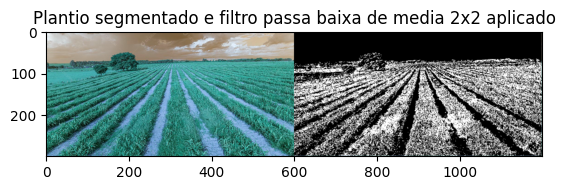

In [14]:
def mostraImagem(titulo, img):
    plt.title(titulo)
    plt.imshow(img)

imagem = cv2.imread("plantioCana.jpg")
imagem = cv2.resize(imagem,(600,300),interpolation = cv2.INTER_AREA)
[col,lin,dim] = imagem.shape
resultado = imagem.copy()

#aplicando segmentação por cores usando os limites r=[80,190], g=[100,170] e b=[30,80] obtidos via coleta de cores do paint
for j in range(0,col-1):
    for i in range(0,lin-1):
        (b,g,r) = imagem[j,i]
        if (b>30 and b<80) and (g>100 and g<170) and (r>80 and r<190):
            b = 255
            g = 255
            r = 255
            resultado[j,i,]= np.array([b,g,r])
        else:
            resultado[j,i,]= np.array([0,0,0])
concat = cv2.hconcat([imagem,resultado])
mostraImagem("Plantio segmentado", concat)

#aplicando filtro de media

filter_blur=cv2.blur(resultado,ksize=(2,2))
concat = cv2.hconcat([imagem,filter_blur])
mostraImagem("Plantio segmentado e filtro passa baixa de media 2x2 aplicado", concat)

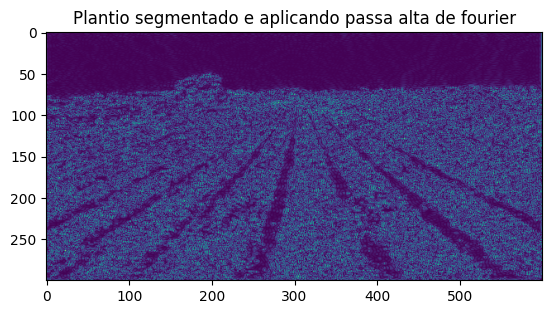

In [15]:
resultado = cv2.cvtColor(filter_blur,cv2.COLOR_BGR2GRAY)
dft = cv2.dft(np.float32(resultado), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
rows, cols = resultado.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
mostraImagem("Plantio segmentado e aplicando passa alta de fourier",img_back)